In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
data = pd.read_csv("inventario.csv")

In [ ]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords

In [ ]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

In [ ]:
titulos = str
for titulo in data["Titles"]:
    titulos = titulo + " " + str(titulos)
titulos

"Progressive selection method for the coupled lot-sizing and cutting-stock problem Optimality of (s, S) policies in EOQ models with general cost structures Model predictive control for inventory management in biomass manufacturing supply chains The value of inventory accuracy in supply Chain management-case study of the yedioth communication press The economic order decision with continuous dynamic pricing and batch supply Assessment of CIM implementation in SMEs: a multiple case study approach Data Mining with Clustering Algorithms to Reduce Packaging Costs: A Case Study Modeling and optimization of multi-echelon inventory for repairable spares based on birth and death process A global simulation-optimisation approach for inventory management in a decentralised supply chain Robust bi-level optimization for green opportunistic supply chain network design problem against uncertainty and environmental risk Perfect Duality in Solving Geometric Programming Problems Under Uncertainty Robust

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
for p in punctuation:
    clean_texto = titulos.lower().replace(p,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")


In [ ]:
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

In [ ]:
lista_texto = clean_texto.split(" ")

palabras = []

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [ ]:
word_count={}
for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
 

In [ ]:
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
inventory,1910
supply,936
model,847
chain,746
demand,664
system,574
production,525
management,512
problem,447
optimal,378


In [ ]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

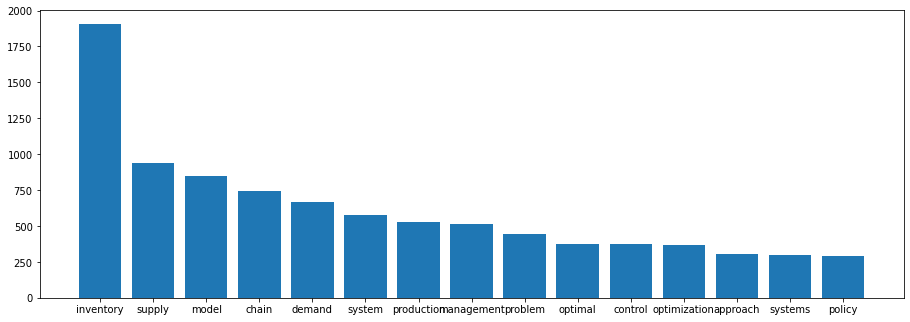

In [ ]:
plot_bar(data=df, top=15)

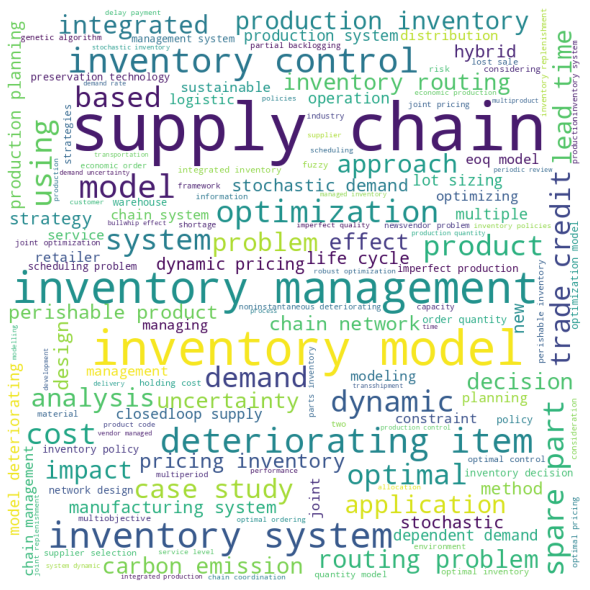

In [ ]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)

word_cloud.to_file("n1.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
data.head()

,Authors,Author full names,Author(s) ID,Titles,Year,Source title,Volume,Issue,Art. No.,Page start,...,Cited by,Link,Abstract,Indexed Keywords,Author Keywords,Document Type,Publication Stage,Open Access,Source,EID
0,López-Barrientos J.D.; Jiménez-Lizárraga M.; E...,"López-Barrientos, José Daniel (56072214800); J...",56072214800; 56000849600; 54417142300,On the Discrete-Time Minimum Principle in Mult...,2023,Cybernetics and Systems,NaN,NaN,NaN,NaN,...,0,https://www.scopus.com/inward/record.uri?eid=2...,This paper presents a robust version of the di...,Digital control systems; Discrete time control...,Discrete-time systems; multiple-mode systems; ...,Article,Article in press,NaN,Scopus,2-s2.0-85148619945
1,Cui W.; Yang Y.; Di L.,"Cui, Weiwei (55569796900); Yang, Yiran (571941...",55569796900; 57194105819; 57221396970,Modeling and optimization for static-dynamic r...,2023,International Journal of Production Economics,257,NaN,108756,NaN,...,0,https://www.scopus.com/inward/record.uri?eid=2...,Additive manufacturing (AM) offers apparent ad...,Additives; Dynamic programming; Heuristic algo...,Additive manufacturing; Delivery route design;...,Article,Final,NaN,Scopus,2-s2.0-85145653221
2,Jauhari W.A.; Wangsa I.D.; Hishamuddin H.; Riz...,"Jauhari, Wakhid Ahmad (40761547000); Wangsa, I...",40761547000; 57193543947; 36835903800; 5724767...,A sustainable vendor-buyer inventory model wit...,2023,Cogent Business and Management,10,1,2158609,NaN,...,0,https://www.scopus.com/inward/record.uri?eid=2...,This paper aims to minimize the emissions in t...,NaN,carbon tax; government incentive; green techno...,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85145602790
3,Ben Elmir W.; Hemmak A.; Senouci B.,"Ben Elmir, Walid (58075133900); Hemmak, Allaou...",58075133900; 58074873900; 15077193600,Smart Platform for Data Blood Bank Management:...,2023,Information (Switzerland),14,1,31,NaN,...,0,https://www.scopus.com/inward/record.uri?eid=2...,Despite the efforts of the World Health Organi...,Balancing; Blood; Forecasting; Inventory contr...,blood bank management; blood supply chain; mac...,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85146720362
4,Luo G.; Ezerman M.F.; Ling S.; Pan X.,"Luo, Gaojun (57194227959); Ezerman, Martianus ...",57194227959; 36720412500; 57289336900; 5721146...,New Families of MDS Symbol-Pair Codes From Mat...,2023,IEEE Transactions on Information Theory,69,3,NaN,1567,...,0,https://www.scopus.com/inward/record.uri?eid=2...,"In emerging storage technologies, the outputs ...",Block codes; Inventory control; Reed-Solomon c...,Matrix-product code; maximum distance separabl...,Article,Final,NaN,Scopus,2-s2.0-85141569046
